### **Notebook 2 - Exploratory Data Analysis (EDA)**

### Introduction

In this section, I will do exploratory data analysis to gather insights and draw conclusions about the dataset. This is both to understand the dataset better and to inform the modelling process later.

A brief summary of the finding is available at the end of this section.

### Loading data and importing libraries

In [80]:
# Importing libraries

import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Seasonal plotting
from statsmodels.api import tsa
import statsmodels.api as sm

In [81]:
# Loading dataset

aqi_df = pd.read_csv('data/cleaned_aqi.csv', parse_dates=['Date'], index_col='Date')
aqi_df.sample(5)

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,lat,lng,population,density,timezone,Year,Month,Day
Date,,,,,,,,,,,,,,
2019-01-24,76,Moderate,NO2,20,Los Angeles,California,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles,2019,1,24
2017-11-01,59,Moderate,PM2.5,19,Los Angeles,California,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles,2017,11,1
1980-02-10,110,Unhealthy for Sensitive Groups,NO2,21,Los Angeles,California,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles,1980,2,10
1992-06-08,151,Unhealthy,Ozone,20,Los Angeles,California,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles,1992,6,8
1988-02-09,188,Unhealthy,CO,21,Los Angeles,California,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles,1988,2,9


---

### Exploratory Data Analysis

### Time-related analysis

First I'll check the range of the date times in the dataset, then plot the daily AQI values against the time to explore any immediate trends and patterns.

In [82]:
# The time range of the data frame

first_day = aqi_df.index.min()
last_day = aqi_df.index.max()

print(f'The earliest date in the dataset is {first_day}, and the latest one is {last_day}.')

The earliest date in the dataset is 1980-01-01 00:00:00, and the latest one is 2021-12-31 00:00:00.


In [83]:
# Visualising air quality and time

fig = px.line(aqi_df, x=aqi_df.index, y=aqi_df['AQI'])

fig.update_layout(
    yaxis_title='Air Quality Index (AQI)',
    title='Air Quality Index from 1980 to 2021')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

This visual is difficult to comprehend and doesn't show the trends in the data clearly enough, so I will look at the yearly, monthly, and daily breakdowns instead.

However, we can draw a few conclusion to guide our next steps:

- there is a downward trend in AQI values across the years, so it's worth looking at the yearly trends
- there seem to be a seasonal pattern in the dataset, with some months outdoing the rest, so it's worth investigating monthly averages
- there are also a few sudden spikes (or extremes) in the dataframe, for example Feb 17, 1991 and Oct 21, 2007, which can be looked into further

#### Yearly, monthly and daily breakdowns

Since my target variable is AQI, I will focus only on this variable and explore how it changes over time.

In [84]:
# Creating a temporary dataframe of the dates and AQI values only (to be used when no other column is needed)

dates_aqi_df = aqi_df['AQI']

In [85]:
# Selecting on the yearly AQI averages

air_quality_yearly = dates_aqi_df.resample('Y').mean()

fig = px.line(air_quality_yearly)
fig.update_layout(
    yaxis_title='Air Quality Index (AQI)',
    title='Air Quality Index - Yearly averages from 1980 to 2021')
fig.show()

Now we can clearly observe a **downward yearly trend** in the dataset. From 1980 until 2020 there was steady decrease in the AQI values, which means that air quality improved over the years in Los Angeles. However, starting from 2020, there was a temporary increase in the values and the latest results are still above the measurements of the preceeding years. 

We also saw monthly trends in the data, so I will focus on the monthly breakdown.

In [97]:
# Selecting on the monthly AQI averages

air_quality_monthly = dates_aqi_df.resample('M').mean()

fig = px.line(air_quality_monthly)
fig.update_layout(
    yaxis_title='Air Quality Index (AQI)',
    title='Air Quality Index - Monthly averages from 1980 to 2021')
fig.show()

We can see that the there's a cyclical trend month-on-month that seems to be persistent across the years, even though the values are dropping over the years. To have a closer look at the trend across the months, I will plot the averages across all months.

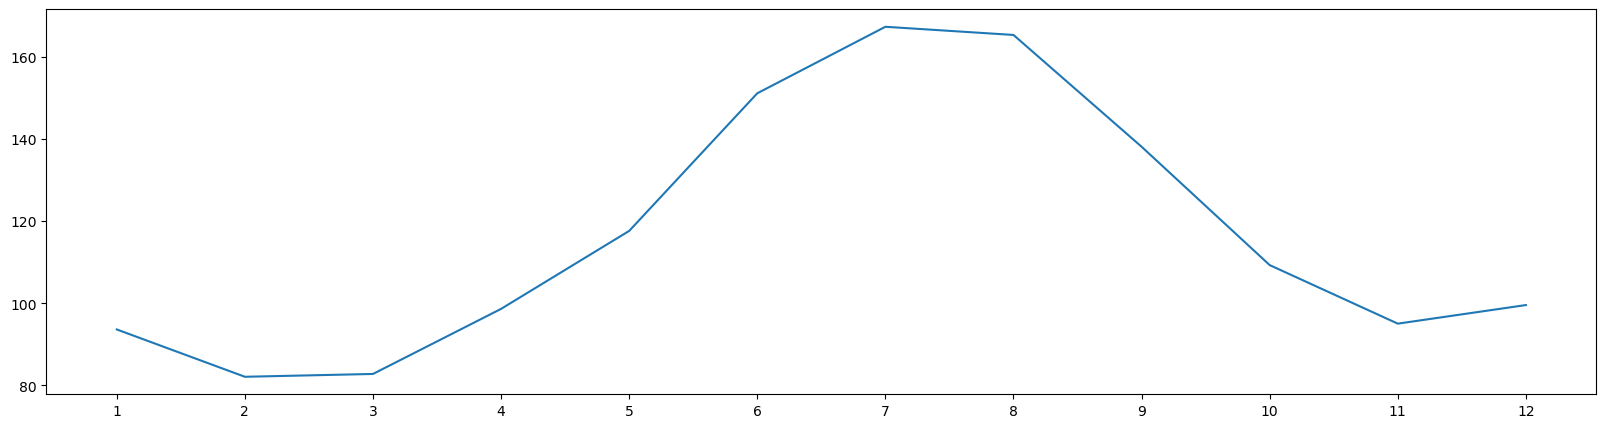

In [87]:
# Selecting averages across all months

air_quality_monthly_avg = aqi_df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(20,5))
plt.plot(air_quality_monthly_avg)
plt.xticks(range(1, 13))
plt.show()

There is an uptick in the AQI over the summer months (6th, 7th, 8th months), i.e. June, July and August, which means a decline in the air quality. Towards the beginning and the end of the year the AQI drops. To understand this monthly pattern in the data better, I'll plot the values on a seasonal plot.

In [88]:
# Using monthly_plot to visualize seasonal trends on a monthly basis

from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(30,5))
month_plot(air_quality_monthly, ax=plt.gca())
plt.title('Seasonal AQI per Month')
plt.show()

NameError: name 'air_quality_monthly' is not defined

<Figure size 3000x500 with 0 Axes>

We can see that the averages in the summer months are higher than in the winter/colder months. We can also observe the same downward trend across all months, however, the steepness of the decrease is not consistent across the months - winter months observed a more moderate decrease than summer months.

We can also see that the recent uptick we saw earlier towards recent years is more heavily pronounced in September and October, where both months saw a sudden spike in AQI values in the recent years.

We could see that there's a distinct difference between the winter and summer months, so it's worth looking at a quarterly breakdown to see how they relate to the rest of the year.

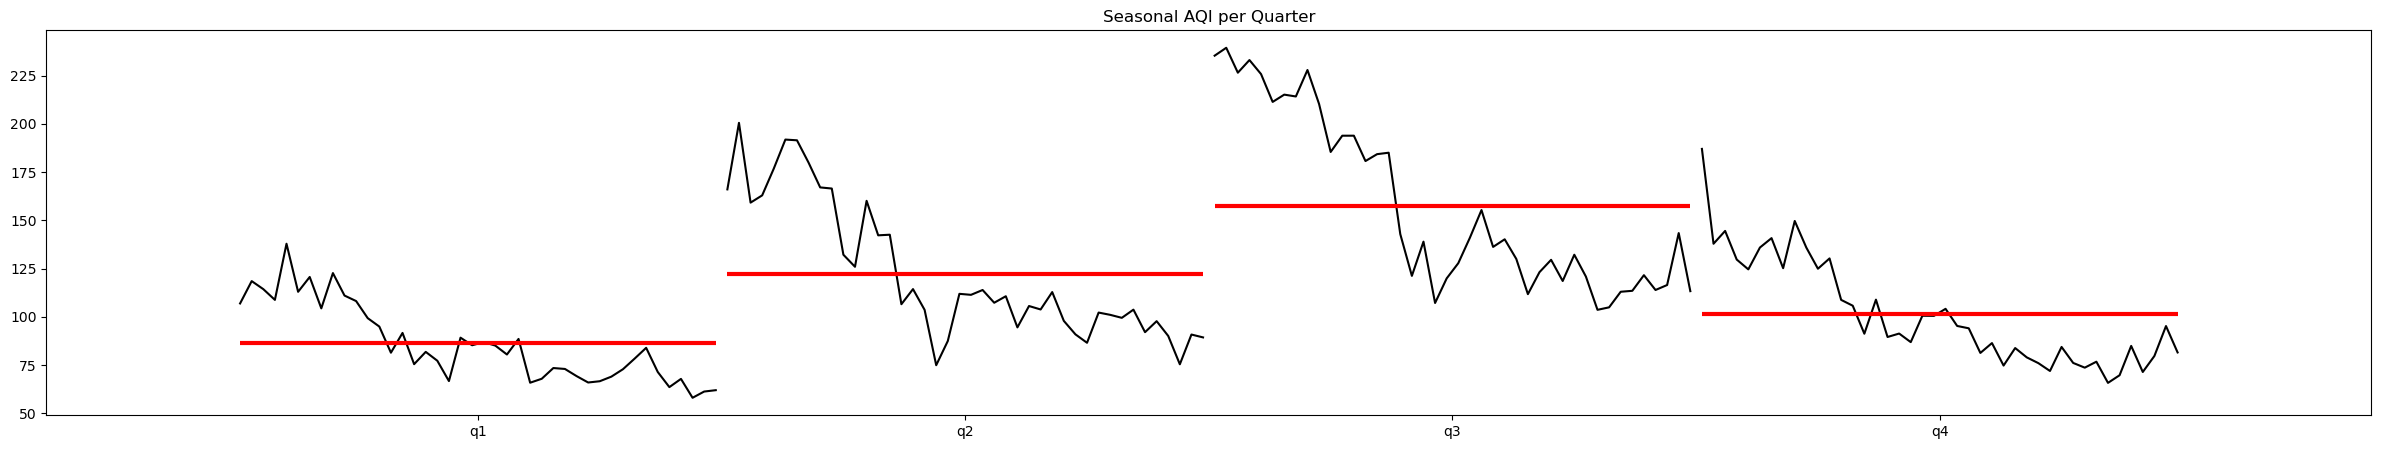

In [89]:
# Using monthly_plot to visualize seasonal trends on a quarterly basis

from statsmodels.graphics.tsaplots import quarter_plot
air_quality_quarterly = dates_aqi_df.resample('Q').mean()

plt.figure(figsize=(30,5))
quarter_plot(air_quality_quarterly, ax=plt.gca())
plt.title('Seasonal AQI per Quarter')
plt.show()

We can see that Q3 has the highest mean across the year, and Q2 are also above the Q1 and Q4 averages. The trends we see here are very similar to the monthly ones - warmer times of the year have a higher AQI, while colder months have lower values.

An interesting thing to note is that both Q4 and Q3 had a steep decrease in AQI values around mid-time, which lines up with the overall yearly trends we saw earlier. However, it seems warmer months went through a more drastic decrease in their AQI values than colder months.

To see how much each 

In [90]:
# Monthly averages and difference from the mean

air_quality_monthly_avg = aqi_df.groupby('Month')['AQI'].mean()
monthly_mean_diff = ((air_quality_monthly_avg - air_quality_monthly_avg.mean())/air_quality_monthly_avg)

# Plotting

fig = px.bar(monthly_mean_diff)
fig.update_layout(
    yaxis_title='Difference (%)',
    yaxis_tickformat = '0.2%',
    title='Difference from monthly averages per month')
fig.show()

We can see that those months that are below the average monthly values outnumber those that are above the average. They are also more heavily under the average than those that are above.

So far we've only seen yearly and monthly averages, so let's have a look at the daily breakdowns.

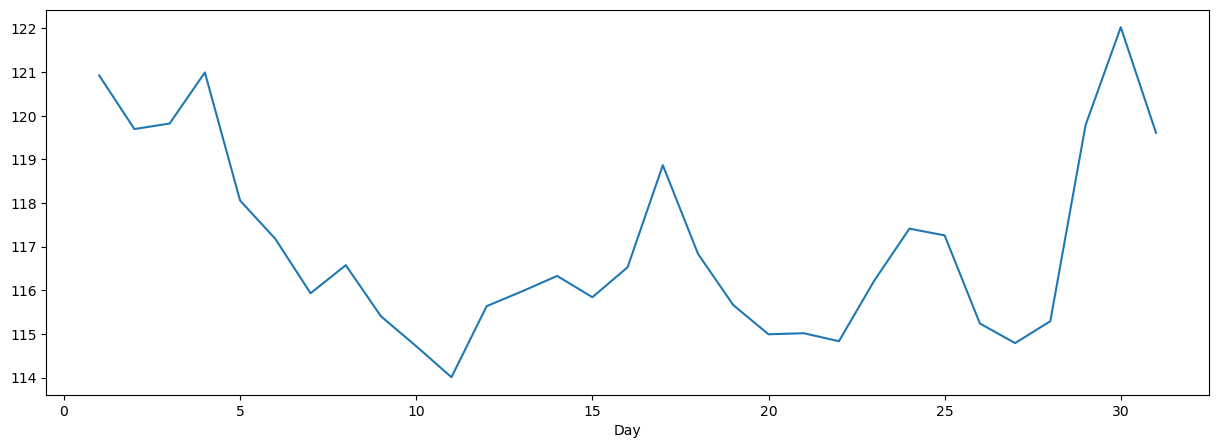

In [96]:
# Plotting daily averages

air_quality_daily_avg = aqi_df.groupby('Day')['AQI'].mean()

plt.figure(figsize=(15,5))
air_quality_daily_avg.plot(kind='line')
plt.show()

We can see that the beginning and the end of the month tend to have higher AQI values, but we don't have consistent values in-between either as we can see quite a lot of fluctuations.

Since we already identified some differences between the winter and summer months, might be interesting to look at the same trends across colder (Q4 and Q1, from October until March) and warmer months (Q2 and Q3, from April until September). We already saw that the warmer/summer months see an increase in the AQI, and winter/colder months (first and second quarter) tend to average lower AQI values, I expect to see some differences in the daily averages and some potential differences in the fluctunations as well.

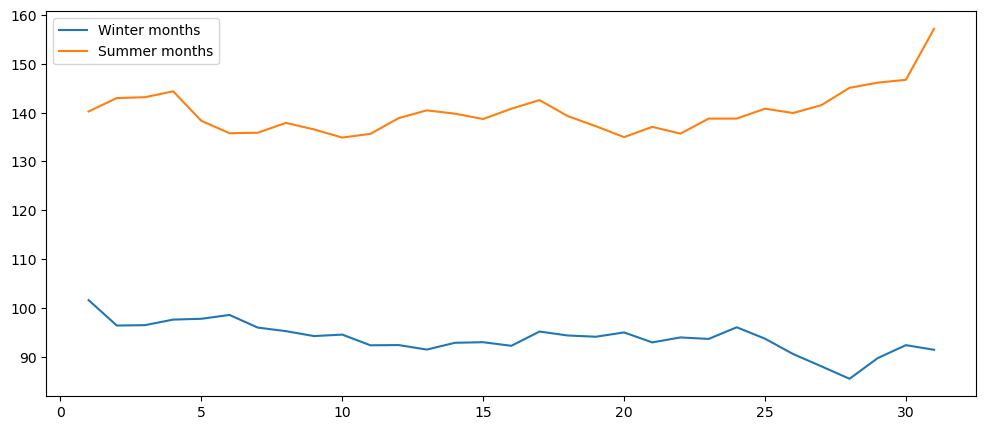

In [92]:
# Winter and summer months daily averages

# Defining winter averages

winter_aqi_df = aqi_df[
    (aqi_df['Month'] >=10) |
    (aqi_df['Month'] <= 3)
     ]

air_quality_daily_winter = winter_aqi_df.groupby('Day')['AQI'].mean()

# Defininf summer averages

summer_aqi_df = aqi_df[
    (aqi_df['Month'] > 3) &
    (aqi_df['Month'] < 10)
     ]

air_quality_daily_summer = summer_aqi_df.groupby('Day')['AQI'].mean()

# Plotting the values on the same graph

plt.figure(figsize=(12,5))
plt.plot(air_quality_daily_winter, label='Winter months')
plt.plot(air_quality_daily_summer, label='Summer months')
plt.legend()
plt.show()

The averages for the warmer days are higher than the colder days, as expected. In terms of the fluctuations, at the beginning of the month, there are no major differences in the trends between summer and winter days. However, in the summer towards the end of the month the AQI values seems to climb up, while in the winter they show a gentle descrease.

#### Yearly and monthly minimum and maximum values

So far I only looked at the trends on a yearly, monthly and daily level and the averages across these ranges. 

/var/folders/p7/x7nl0l710_59cx0h8fdj8v9r0000gp/T/ipykernel_8191/96295782.py:17: UserWarning:

The figure layout has changed to tight



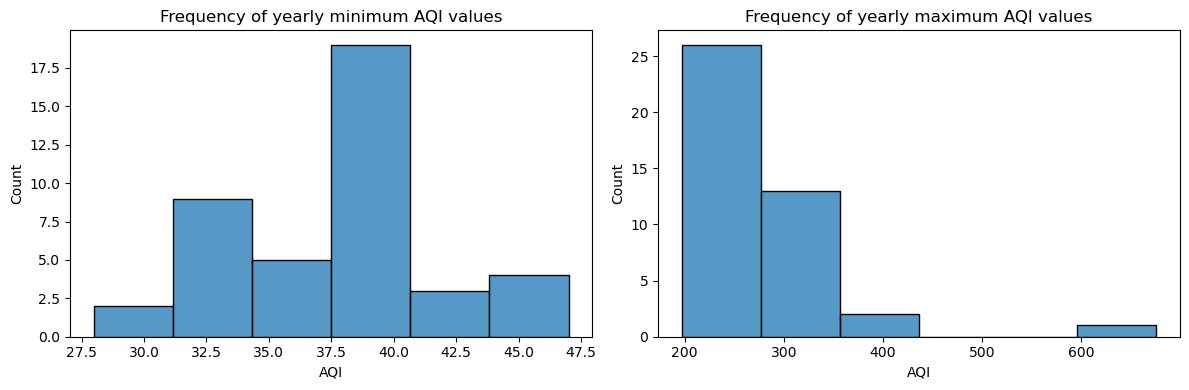

In [162]:
# Defining minimum and maximum values across the years

min_yearly_aqi = dates_aqi_df.resample('Y').min()
max_yearly_aqi = dates_aqi_df.resample('Y').max()

# Plotting them

plt.figure(figsize=(12,4))
plt.subplot (1, 2, 1)
sns.histplot(min_yearly_aqi, bins=6)
plt.title('Frequency of yearly minimum AQI values')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.histplot(max_yearly_aqi, bins=6)
plt.title('Frequency of yearly maximum AQI values')
plt.tight_layout()

plt.show()

Yearly minimum values range between 27.5 and 47.5, i.e. the values range within a 20-point scale. The values don't appear to have a normal distribution, however, the values are somehow evenly spread around the left and right ends of the curve, with the middle category being the most populated one.

Maximum values have a much broader range and they take values between 200 and 600 points. The distribution appears to be right-skewed with values around the right tail being significantly lower in numbers. This means that most yearly maximum values tend to be around 200 and 350 points.

/var/folders/p7/x7nl0l710_59cx0h8fdj8v9r0000gp/T/ipykernel_8191/1886710907.py:18: UserWarning:

The figure layout has changed to tight



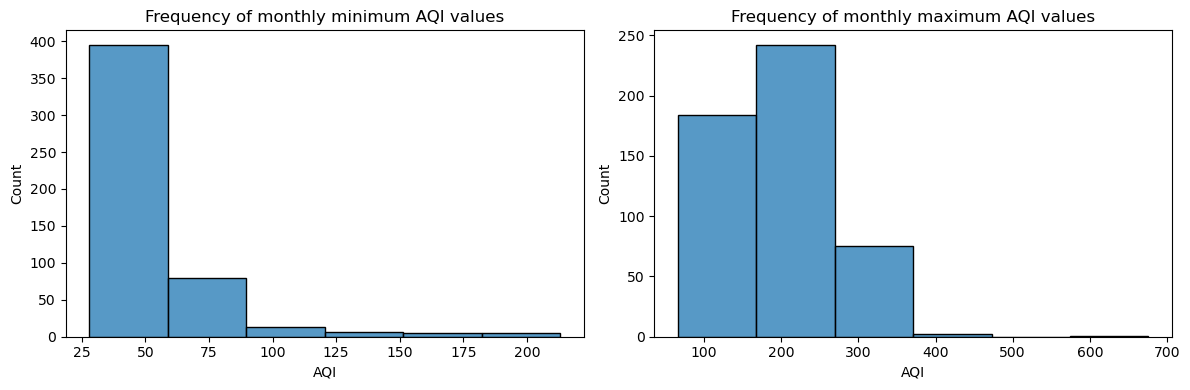

In [155]:
# Defining monthly minimum and maximum

min_monthly_aqi = dates_aqi_df.resample('M').min()
max_monthly_aqi = dates_aqi_df.resample('M').max()


# Plotting them

plt.figure(figsize=(12,4))
plt.subplot (1, 2, 1)
sns.histplot(min_monthly_aqi, bins=6)
plt.title('Frequency of monthly minimum AQI values')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.histplot(max_monthly_aqi, bins=6)
plt.title('Frequency of monthly maximum AQI values')
plt.tight_layout()

plt.show()

We can see that that the monthly minimum values are strongly right-skewed, as majority of the values are between 25 and around 85. The values towards the right tail are much less frequent. However, the range of the minimum values is more diverse than the yearly minimum range, and it takes values between 25 and 210.

The maximum values are also right-skewed, but it's less straight-forward as we see some fluctuations in the most frequent value bins. It seems that the most frequent monthly maximum values are between 200 and 300.

### Distributions

I'll check the distribution of the other variables in the dataframe. 

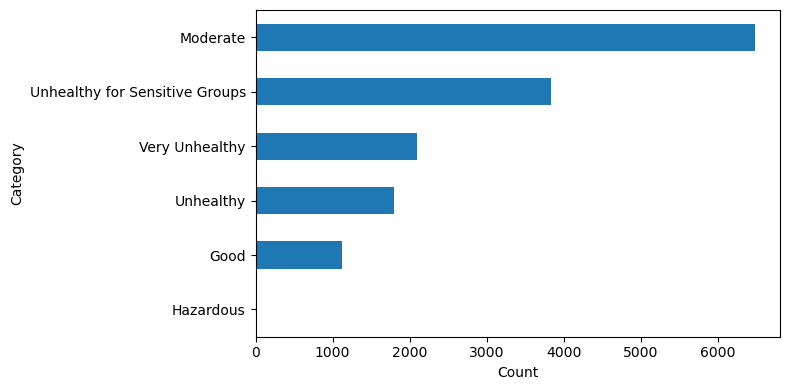

In [158]:
# Plotting the air quality categories

plt.figure(figsize=(8,4))
aqi_df['Category'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

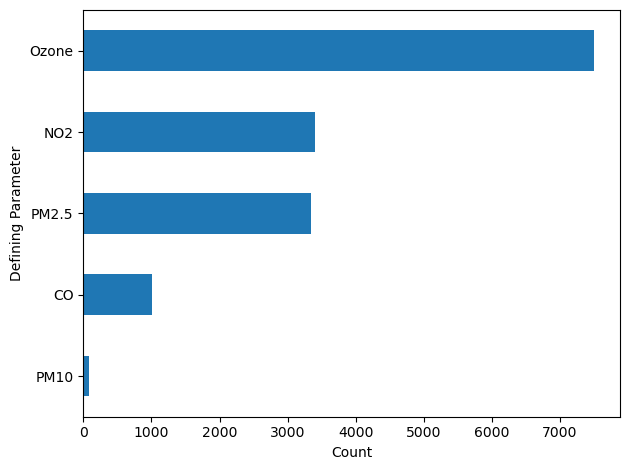

In [156]:
# Plotting defining parameters

plt.figure()
aqi_df['Defining Parameter'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

---

### Brief summary

We can draw the following conclusion based on the EDA process:

- **Yearly trends**: AQI is dropping over the years which marks an increase in the air quality, however, the most frequent classification is 'Moderate'
- **Monthly treands**: Warmers months seem to have worse air quality (higher AQI values), while the average AQI of colder months are below overall monthly averages. 
- AQI fluctuates throughout the month, however, the beginning and the end of the month seems to have higher values
- **Daily trends**: 
